In [1]:

import os
import subprocess
import csv
from collections import Counter

import numpy as np
import pandas as pd

from Bio import Seq
from Bio import SeqRecord
from Bio import SeqIO

from tqdm import tnrange, tqdm_notebook

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

db = SeqIO.parse("../db_preparation/resfinder_20191001/db_formatted.fasta", "fasta")
db = {k.id:k.seq for k in db}
# This DB just contains unique sequences and names have been renamed to make things run easily with all programs

linkfile = "../db_preparation/resfinder_20191001/db_link.csv"
link = pd.read_csv(linkfile, index_col=0, header=None)
rlink = pd.read_csv(linkfile, index_col=1, header=None)

In [7]:
# Due to an error how I wrote th original correct code, the headers dont match the columns
# with open("dual_correct.csv") as f:
#     reader = csv.reader(f, delimiter = ",")
#     n = 0
#     for line in reader:
#         print(len(line))
#         n +=1 
#         if n == 100:
#             break

# This is not a problem for the analysis but needs to be accounted for here

correct = pd.read_csv("dual_correct.csv")

fileset = []
for k in range(len(correct)):
    if k < 10000:
        fileset.append(1)
    elif 10000<=k < 20000:
        fileset.append(2)
    elif 20000<=k < 30000:
        fileset.append(3)
    elif 30000<=k < 40000:
        fileset.append(4)
    elif 40000<=k < 50000:
        fileset.append(5)
    elif 50000<=k < 60000:
        fileset.append(6)
    elif 60000<=k < 70000:
        fileset.append(7)
    elif 70000<=k < 80000:
        fileset.append(8)
    elif 80000<=k < 90000:
        fileset.append(9)
    elif 90000<=k:
        fileset.append(10)
correct["fileset"] = fileset


dual_exclusions = list(pd.read_csv("dual_exclusion.csv", header=None)[0])
boolean_series = ~correct.gene_1.isin(dual_exclusions)
correct_1 = correct[boolean_series]
boolean_series = ~correct_1.gene_2.isin(dual_exclusions)
correct_2 = correct_1[boolean_series]
print(len(correct_2))

pairs = []
for k in tnrange(len(correct_2)):
    k_pair = sorted(list(set([correct_2.iloc[k].gene_1, correct_2.iloc[k].gene_2])))
    assert len(k_pair) == 2
    k_pair = sorted(k_pair)
    pairs.append((k_pair[0], k_pair[1]))
print(len(pairs))
m = list(set(pairs))
print(len(m))
# So this code above tells me that we have 46318 pairs of genes left in for analysis.
correct = correct_2

correct.head()

# Note as a baseline I have included every possible pairing in this dataset
# This is to enable flexibility of analysis and ease of reproduction of approach
# You need to add the following to cut the data down as per the papaer itself

46318



46318
46318


,Unnamed: 0,simulation,gene_1,gene_2,orig_1,orig_2,jacc_similarity,fileset
0,0,dual_0,resfindernewid_2575,resfindernewid_2576,nimE_1_AJ244018,nimE_1_AM042593,0.495512,1
1,1,dual_1,resfindernewid_2574,resfindernewid_2577,nimD_1_X76949,nimF_1_AJ515145,0.005650,1
2,2,dual_2,resfindernewid_2579,resfindernewid_2580,nimI_1_FJ940883,nimI_1_FJ940884,0.437710,1
3,3,dual_3,resfindernewid_2579,resfindernewid_2581,nimI_1_FJ940883,nimI_1_FJ940886,0.315871,1
4,4,dual_4,resfindernewid_2579,resfindernewid_2582,nimI_1_FJ940883,nimI_1_FJ940887,0.538739,1


In [8]:
# Just for my own sanity, I next want to do some sense checking.
# Essentially this looks at each of the genes and then finds which kmers each side shares
# I predominantly look at this for a selection of low similarity pairings 

t = sorted(list(set(list(correct.jacc_similarity))))
low_similarity = t[0:1000]
for k in low_similarity:
    k_data = correct.loc[correct.jacc_similarity == k]
    test_case = (link.loc[list(k_data.gene_1)[0]][2],link.loc[list(k_data.gene_2)[0]][2])
    kmers_1 = set([test_case[0][m:m+31] for m in range(len(test_case[0])-31)])
    kmers_2 = set([test_case[1][m:m+31] for m in range(len(test_case[1])-31)])
    print(k, kmers_1.intersection(kmers_2))
    print("")
    print("")


0.0002533569799847986 {'AAAGGTTGGCAAAAAGATAAATCTTGGGGTG'}


0.0003713330857779428 {'AGGAAGCTGGTGCTGGAATGAGTTTGCTTAA'}


0.00038774718883288094 {'GCTTTTTTAAGATTCATCAGGAAGCACAGCC', 'GGCTTTTTTAAGATTCATCAGGAAGCACAGC'}


0.0003879728419010669 {'GCTTTTTTAAGATTCATCAGGAAGCACAGCC', 'GGCTTTTTTAAGATTCATCAGGAAGCACAGC'}


0.0004275331338178709 {'TGATTTACCCTACATTAATCTTACTCGCCGG'}


0.0005068423720223012 {'AAAGGTTGGCAAAAAGATAAATCTTGGGGTG', 'AAGGTTGGCAAAAAGATAAATCTTGGGGTGG'}


0.0006287331027978622 {'ATGATGTCGATACCGCCAAATACCAAGAAAA', 'TATGATGTCGATACCGCCAAATACCAAGAAA'}


0.0006489292667099286 {'TAGATGAACCAACAAACTTTCTTGATATGGA', 'TACTCAGTCGATTGAGTATTGAACCTTCGGA'}


0.0006565988181221272 {'ATCAAGAATTTGCCCGCCAAATTGGCGAGGC'}


0.0008826125330979699 {'CTACGCGATACTTTTCAAGATTTTGGCTGGG', 'TACGCGATACTTTTCAAGATTTTGGCTGGGA'}


0.0008920606601248885 {'TCCAGCCGCTGATGCAGAAGAATAATATTCC', 'ATCCAGCCGCTGATGCAGAAGAATAATATTC'}


0.0008968609865470852 {'TCGTGGAACGTACCGTTACGCCCCTGATGAA', 'GTCGTGGAACGTACCGTTACGCCCCTGATGA'}



0.0056710775047258966 {'GGCGCGCTGGATCAAGTATTCGGTGGTCTGG', 'CCGACTGGGGCGGCGACGCCTGGCGCCAGCC', 'CCCGACTGGGGCGGCGACGCCTGGCGCCAGC', 'CCGGCGCGCTGGATCAAGTATTCGGTGGTCT', 'GCTGGCGCCTGTATGGCAAGACCGGCACCGG', 'CGGCGCGCTGGATCAAGTATTCGGTGGTCTG', 'CGCGCTGGATCAAGTATTCGGTGGTCTGGTA', 'GGCTGGCGCCTGTATGGCAAGACCGGCACCG', 'GCGCGCTGGATCAAGTATTCGGTGGTCTGGT'}


0.005735140771637122 {'CAGCTTGGAAAAGTATTAAGACAAATTCATG', 'TTGGAAAAGTATTAAGACAAATTCATGAAAC', 'TTCTGGAATAAAAGAAATTATTTTTCCTATC', 'CTTGGAAAAGTATTAAGACAAATTCATGAAA', 'TGATTCTGGAATAAAAGAAATTATTTTTCCT', 'ATGATTCTGGAATAAAAGAAATTATTTTTCC', 'GCTTGGAAAAGTATTAAGACAAATTCATGAA', 'AGCTTGGAAAAGTATTAAGACAAATTCATGA', 'ATTCTGGAATAAAAGAAATTATTTTTCCTAT', 'CATGATTCTGGAATAAAAGAAATTATTTTTC', 'GATTCTGGAATAAAAGAAATTATTTTTCCTA'}


0.005749880210828941 {'ATCAGGGTCAGCCGCACTACTTTACCTTCGG', 'GGTGATTTATCAGGGTCAGCCGCACTACTTT', 'TTTATCAGGGTCAGCCGCACTACTTTACCTT', 'GTGATTTATCAGGGTCAGCCGCACTACTTTA', 'CGGTGATTTATCAGGGTCAGCCGCACTACTT', 'TATCAGGGTCAGCCGCACTACTTTACCTTCG', 'ATTTATCAGGGTCAGCCG

0.01284796573875803 {'TGGCTAGTTAAAAATAAAATTGAAGTTTTTT', 'TTGGCTAGTTAAAAATAAAATTGAAGTTTTT', 'CTATTGGCTAGTTAAAAATAAAATTGAAGTT', 'TAAAAATAAAATTGAAGTTTTTTATCCAGGC', 'AAAAATAAAATTGAAGTTTTTTATCCAGGCC', 'GGCTAGTTAAAAATAAAATTGAAGTTTTTTA', 'TTAAAAATAAAATTGAAGTTTTTTATCCAGG', 'ATTGGCTAGTTAAAAATAAAATTGAAGTTTT', 'GTTAAAAATAAAATTGAAGTTTTTTATCCAG', 'TATTGGCTAGTTAAAAATAAAATTGAAGTTT', 'CTAGTTAAAAATAAAATTGAAGTTTTTTATC', 'TAGTTAAAAATAAAATTGAAGTTTTTTATCC', 'AAATAAAATTGAAGTTTTTTATCCAGGCCCA', 'AGTTAAAAATAAAATTGAAGTTTTTTATCCA', 'AAAATAAAATTGAAGTTTTTTATCCAGGCCC', 'AATAAAATTGAAGTTTTTTATCCAGGCCCAG', 'GCTAGTTAAAAATAAAATTGAAGTTTTTTAT', 'ATAAAATTGAAGTTTTTTATCCAGGCCCAGG'}


0.012939001848428836 {'GACTACGTGCTGCACGGCAAGACGGGCTGGT', 'TGCCGTTCTCGGCGCGCTCGCAGGACATCGT', 'ACGCTGCCGTTCTCGGCGCGCTCGCAGGACA', 'TCGAGCGTGACGGCAACCTCACCATGATCGC', 'CACGCTGCCGTTCTCGGCGCGCTCGCAGGAC', 'CTCGAGCGTGACGGCAACCTCACCATGATCG', 'GGGCACGCTGCCGTTCTCGGCGCGCTCGCAG', 'GCACGCTGCCGTTCTCGGCGCGCTCGCAGGA', 'CGCTGCCGTTCTCGGCGCGCTCGCAGGACAT', 'CTGCCGTTC

0.025145067698259187 {'AAAAGGAATACCTAGCTCTGTTCGAAAAGAG', 'TTAGCTCGTCGTATTGGACTTGAGCTCATGT', 'TTTAGCTCGTCGTATTGGACTTGAGCTCATG', 'AATACCTAGCTCTGTTCGAAAAGAGATTACT', 'TAGAAATGAAAAAAGGAATACCTAGCTCTGT', 'AGCTCGTCGTATTGGACTTGAGCTCATGTCT', 'GATTTAGCTCGTCGTATTGGACTTGAGCTCA', 'AGGAATACCTAGCTCTGTTCGAAAAGAGATT', 'AAATATACGCAAAAAGTGGTTGGGGATGGGA', 'AATGAAAAAAGGAATACCTAGCTCTGTTCGA', 'AGATTTAGCTCGTCGTATTGGACTTGAGCTC', 'GAAAAAAGGAATACCTAGCTCTGTTCGAAAA', 'AAAAAGGAATACCTAGCTCTGTTCGAAAAGA', 'AGAAATGAAAAAAGGAATACCTAGCTCTGTT', 'GGAATACCTAGCTCTGTTCGAAAAGAGATTA', 'TCAAGATTTAGCTCGTCGTATTGGACTTGAG', 'TAGCTCGTCGTATTGGACTTGAGCTCATGTC', 'TGAAAAAAGGAATACCTAGCTCTGTTCGAAA', 'AAGGAATACCTAGCTCTGTTCGAAAAGAGAT', 'TATCAAGATTTAGCTCGTCGTATTGGACTTG', 'AAATGAAAAAAGGAATACCTAGCTCTGTTCG', 'TTAGAAATGAAAAAAGGAATACCTAGCTCTG', 'AGTTTATCAAGATTTAGCTCGTCGTATTGGA', 'CAAGATTTAGCTCGTCGTATTGGACTTGAGC', 'AAAATATACGCAAAAAGTGGTTGGGGATGGG', 'GAAATGAAAAAAGGAATACCTAGCTCTGTTC', 'TACCTAGCTCTGTTCGAAAAGAGATTACTTA', 'AAGATTTAGCTCGTCGTATTGGACTTGAGCT'

0.054945054945054944 {'CATCGGGCCTGCGGCTTCGAAGAGACCGAAC', 'GCTGCCGCGAACTGGCTTCGGACAGTCGCGT', 'CTGCCGCGAACTGGCTTCGGACAGTCGCGTG', 'CACGCCGCGCATCGGGCCTGCGGCTTCGAAG', 'GAAGTGCGCCTGCGCCATGACTACGTGAACG', 'CTCACGCCGCGCATCGGGCCTGCGGCTTCGA', 'CTGGAGGGCTGGTACGTGCAGCCGCAGTGGC', 'CAGGCTCACGCCGCGCATCGGGCCTGCGGCT', 'CGGGCTGCCGCGAACTGGCTTCGGACAGTCG', 'CGCGCATCGGGCCTGCGGCTTCGAAGAGACC', 'TCCTGGAGGGCTGGTACGTGCAGCCGCAGTG', 'GGGCTGGTACGTGCAGCCGCAGTGGCAAGGC', 'GCGCATCGGGCCTGCGGCTTCGAAGAGACCG', 'GGGCTGCCGCGAACTGGCTTCGGACAGTCGC', 'CGTGCAGGCTCACGCCGCGCATCGGGCCTGC', 'GCCGCGCATCGGGCCTGCGGCTTCGAAGAGA', 'ACGTGCAGGCTCACGCCGCGCATCGGGCCTG', 'GCATCGGGCCTGCGGCTTCGAAGAGACCGAA', 'GCCGCGAACTGGCTTCGGACAGTCGCGTGGA', 'CCTGGAGGGCTGGTACGTGCAGCCGCAGTGG', 'CGCATCGGGCCTGCGGCTTCGAAGAGACCGA', 'CGGGCCTGCGGCTTCGAAGAGACCGAACGGG', 'TTCCTGGAGGGCTGGTACGTGCAGCCGCAGT', 'TGGAGGGCTGGTACGTGCAGCCGCAGTGGCA', 'GGGCCTGCGGCTTCGAAGAGACCGAACGGGT', 'TGCCGCGAACTGGCTTCGGACAGTCGCGTGG', 'GGAGGGCTGGTACGTGCAGCCGCAGTGGCAA', 'AAGTGCGCCTGCGCCATGACTACGTGAACGG'

0.1285140562248996 {'TGAATAAGATTATCGGTTACCTTGGCGGGCC', 'TGATGGCCGCCGCCGCGGTGTTAAAACAGAG', 'AGATTATCGGTTACCTTGGCGGGCCGGAAAA', 'CCATGTGCAGCACCGGTAAAGTGATGGCCGC', 'TGTGCAGCACCGGTAAAGTGATGGCCGCCGC', 'CGATATCGCGGTGATCTGGCCGGAAAATCAT', 'TACGGCACCACCAACGATATCGCGGTGATCT', 'TGGCGGGCCGGAAAAAGTCACCGCATTCGCC', 'TGCCATGTGCAGCACCGGTAAAGTGATGGCC', 'CCGCAAGCTGGGCGGTCGGGGATAAAACCGG', 'ACGGCACCACCAACGATATCGCGGTGATCTG', 'ATTATCGGTTACCTTGGCGGGCCGGAAAAAG', 'GCAGGCCTGCCCGCAAGCTGGGCGGTCGGGG', 'AGCCCGATTACCGAAAAACATCTGCAAAGCG', 'AAAGGCAATACCACCGGCGGGCAAAGCATTC', 'AGGCCTGCCCGCAAGCTGGGCGGTCGGGGAT', 'CTGGGCAATGCGCTGGGCGAACAGCAGCGCG', 'CGCCGCCGCGGTGTTAAAACAGAGCGAAAGC', 'CCGCCGCCGCGGTGTTAAAACAGAGCGAAAG', 'CGAAAAACATCTGCAAAGCGGAATGACCCTG', 'AATGCGCTGGGCGAACAGCAGCGCGCCCAGT', 'ACAATACCGCGATGAATAAGATTATCGGTTA', 'TCTGGAGCCCGATTACCGAAAAACATCTGCA', 'CGGTAAAGTGATGGCCGCCGCCGCGGTGTTA', 'AAGTGATGGCCGCCGCCGCGGTGTTAAAACA', 'ACCAACGATATCGCGGTGATCTGGCCGGAAA', 'AATACCGCGATGAATAAGATTATCGGTTACC', 'AAGCTGGCTGATTTAGAAAAACGTTCCGGCG', 

0.16049382716049382 {'CGACCCGAGAGACACCACCACGCCGCGGGCG', 'ACGGCTTTTGCCCGCGCGATCGGCGATGAGA', 'CAAATTGATTGCCCAGCTCGGTGGCCCGGGA', 'GCTTTTGCCCGCGCGATCGGCGATGAGACGT', 'GACAATACCGCCATGAACAAATTGATTGCCC', 'CATGCGCTGGGCGAAACCCAGCGGGCGCAGT', 'GCGTCAGCTTACGCTGGGTCATGCGCTGGGC', 'GCGCGGCCGCGTTGCAGTACAGCGACAATAC', 'CCCAGCGGGCGCAGTTGGTGACGTGGCTCAA', 'CCATGAACAAATTGATTGCCCAGCTCGGTGG', 'ATACCGCCATGAACAAATTGATTGCCCAGCT', 'ACAAATTGATTGCCCAGCTCGGTGGCCCGGG', 'TCGGTGGCCCGGGAGGCGTGACGGCTTTTGC', 'GAACAAATTGATTGCCCAGCTCGGTGGCCCG', 'TCAGCTTACGCTGGGTCATGCGCTGGGCGAA', 'CTTTTGCCCGCGCGATCGGCGATGAGACGTT', 'CCCGCGCGATCGGCGATGAGACGTTTCGTCT', 'CGCTGGGCGAAACCCAGCGGGCGCAGTTGGT', 'CGCTGGGTCATGCGCTGGGCGAAACCCAGCG', 'GCTGGGTCATGCGCTGGGCGAAACCCAGCGG', 'GCGCAGTTGGTGACGTGGCTCAAAGGCAATA', 'ATTCCCGGCGACCCGAGAGACACCACCACGC', 'CGCCATGAACAAATTGATTGCCCAGCTCGGT', 'GAGGCGTGACGGCTTTTGCCCGCGCGATCGG', 'TGGCCCGGGAGGCGTGACGGCTTTTGCCCGC', 'GCAGTTGGTGACGTGGCTCAAAGGCAATACG', 'CCCAGCTCGGTGGCCCGGGAGGCGTGACGGC', 'ACAATACCGCCATGAACAAATTGATTGCCCA',

0.18487394957983194 {'TCGCACTGAACCTACGCTGAATACCGCCATT', 'CGACCCGAGAGACACCACCACGCCGCGGGCG', 'ACGGCTTTTGCCCGCGCGATCGGCGATGAGA', 'CAAATTGATTGCCCAGCTCGGTGGCCCGGGA', 'GCTTTTGCCCGCGCGATCGGCGATGAGACGT', 'GACAATACCGCCATGAACAAATTGATTGCCC', 'CATGCGCTGGGCGAAACCCAGCGGGCGCAGT', 'GCGTCAGCTTACGCTGGGTCATGCGCTGGGC', 'GCGCGGCCGCGTTGCAGTACAGCGACAATAC', 'CCCAGCGGGCGCAGTTGGTGACGTGGCTCAA', 'CCATGAACAAATTGATTGCCCAGCTCGGTGG', 'ATACCGCCATGAACAAATTGATTGCCCAGCT', 'ACAAATTGATTGCCCAGCTCGGTGGCCCGGG', 'TCGGTGGCCCGGGAGGCGTGACGGCTTTTGC', 'CGTCTGGATCGCACTGAACCTACGCTGAATA', 'GAACAAATTGATTGCCCAGCTCGGTGGCCCG', 'TCAGCTTACGCTGGGTCATGCGCTGGGCGAA', 'CTTTTGCCCGCGCGATCGGCGATGAGACGTT', 'CCCGCGCGATCGGCGATGAGACGTTTCGTCT', 'CGCTGGGCGAAACCCAGCGGGCGCAGTTGGT', 'TCGTCTGGATCGCACTGAACCTACGCTGAAT', 'ATGAGACGTTTCGTCTGGATCGCACTGAACC', 'CGCTGGGTCATGCGCTGGGCGAAACCCAGCG', 'GCTGGGTCATGCGCTGGGCGAAACCCAGCGG', 'GCGCAGTTGGTGACGTGGCTCAAAGGCAATA', 'ATTCCCGGCGACCCGAGAGACACCACCACGC', 'GATGAGACGTTTCGTCTGGATCGCACTGAAC', 'CGCCATGAACAAATTGATTGCCCAGCTCGGT',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
# Now making a cleaner class to do the working above
# This also needs to add in filters

def interpret_results(found_genes, correct_genes):
    output = ''
    found_genes = sorted(found_genes)
    correct_genes = sorted(correct_genes)
    a= correct_genes[0] in found_genes
    b= correct_genes[1] in found_genes 
        # No correct calls
    if (a,b) == (False, False):
        output = 'nil_correct'
    # One correct, no additional calls
    if a == True and  b == False and len(found_genes) == 1:
        output = 'one_correct'
    if a == False and  b == True and len(found_genes) == 1:
        output = 'one_correct'
    # One correct, additional calls
    if a == True and  b == False and len(found_genes) > 1:
        output = 'one_correct_add'
    if a == False and  b == True and len(found_genes) > 1:
        output = 'one_correct_add'
    # two correct, no additional calls
    if a == True and  b == True and len(found_genes) == 2:
        output = 'two_correct'
    # One correct, additional calls
    if a == True and  b == True and len(found_genes) > 2:
        output = 'two_correct_add'
    return output
    
def jacc_group(jacc_sim):
    for k in range(10):
        jacc_lims = (round(0.1*k, 3), round(0.1*k+0.1, 3))
        # Interestingly you need to round here, Python 3 curio
        if jacc_lims[0] <= jacc_sim < jacc_lims[1]:
            output = jacc_lims
        else:
            pass
    return output

class simulation:
    
    def __init__(self, sim_name):
        self.sim_name = sim_name
        self.cg_1 = list(correct.loc[correct.simulation == self.sim_name].gene_1)[0]
        self.og_1 = list(correct.loc[correct.simulation == self.sim_name].orig_1)[0]
        self.cg_2 = list(correct.loc[correct.simulation == self.sim_name].gene_2)[0]
        self.og_2 = list(correct.loc[correct.simulation == self.sim_name].orig_2)[0]
        self.correct_genes = [self.cg_1, self.cg_2]
        self.jacc = list(correct.loc[correct.simulation == self.sim_name].jacc_similarity)[0]
        self.jacc_group = jacc_group(self.jacc)
        self.fileset = list(correct.loc[correct.simulation == self.sim_name].fileset)[0]
        
        # Note some key default parameters
        # ABRicate 
        #   --minid [n.n]   Minimum DNA %identity (default '75').
        #   --mincov [n.n]  Minimum DNA %coverage (default '0').
        
        #ARIBA
        #   --nucmer_min_id INT   Minimum alignment identity (delta-filter -i) [90]
        #   --nucmer_min_len INT  Minimum alignment length (delta-filter -i) [20]
        #   --nucmer_breaklen INT
        #                         Value to use for -breaklen when running nucmer [200]        
        
        #KmerRes
        # -id		ID threshhold			70.0
        
        #SRST2
        #   --min_coverage MIN_COVERAGE
        #                         Minimum %coverage cutoff for gene reporting (default
        #                         90)
        #   --max_divergence MAX_DIVERGENCE
        #                         Maximum %divergence cutoff for gene reporting (default
        #                         10)
        #   --min_depth MIN_DEPTH
        #                         Minimum mean depth to flag as dubious allele call
        #                         (default 5)
        #   --min_edge_depth MIN_EDGE_DEPTH
        #                         Minimum edge depth to flag as dubious allele call
        #                         (default 2)        
        
        # ABRicate
        self.abricate_path = "output_fl{0}/abricate_summary/{1}_assem.tab" .format(self.fileset, self.sim_name)
        self.abricate_fl = pd.read_csv(self.abricate_path, delimiter = "\t")
        self.abricate_genes = sorted(list(set(list(self.abricate_fl.GENE))))
        self.abricate_output = interpret_results(self.abricate_genes, self.correct_genes)
        # Note for the statement about incomplete alleles, you look at times when one of the correct alleles is found but found in a fragmented way (i.e. no coverage = 100%)
        

        # ARIBA
        self.ariba_path = "output_fl{0}/ariba_summary/{1}.expandedreport.tsv" .format(self.fileset, self.sim_name)
        self.ariba_fl = pd.read_csv(self.ariba_path, delimiter = "\t")
        self.ariba_genes = sorted(list(set(list(self.ariba_fl.ref_name))))
        self.ariba_output = interpret_results(self.ariba_genes, self.correct_genes)  
        # To look at fragmented assemblies, it is fairly similar to ABRicate, however, this time you use ARIBA's flag "assembled" which if it fails, you call the allele freagmented
        
        # KmerRes
        self.kmerres_path = "output_fl{0}/kmerres_summary/{1}.KmerRes" .format(self.fileset, self.sim_name)
        self.kmerres_fl = pd.read_csv(self.kmerres_path, delimiter = "\t")
        # Once again applying the filter given kmerres doesn't seem to automatically do this.
        # Note this is deemed running it with recommended settings as it is in the usage manual as the default
        self.kmerres_fl = self.kmerres_fl.loc[self.kmerres_fl.template_id > 70.0]
        self.kmerres_genes = sorted(list(set([k for k in list(self.kmerres_fl['#Template']) if "resfindernewid" in str(k)])))
        self.kmerres_output = interpret_results(self.kmerres_genes, self.correct_genes)
        
        # SRST2
        self.srst2_path = "output_fl{0}/srst2_summary/{1}_SRST.out__fullgenes__seqs_clustered__results.txt" .format(self.fileset, self.sim_name)
        if os.path.isfile(self.srst2_path) == False:
            print("Issue")
        # Note in contrast to the single scenario, SRST2 is able to produce an output for every simulation
        # This isn't unexpected as every sample contains 2 genes SRST2 was previously able to identify
    
        self.srst2_fl = pd.read_csv(self.srst2_path, delimiter = "\t")
        self.srst2_genes = sorted(list(set(list(self.srst2_fl.allele))))
        self.srst2_output = interpret_results(self.srst2_genes, self.correct_genes)   


In [12]:
# Now the main working script

simulations_dict = {}

abricate_output = []
ariba_output = []
kmerres_output = []
srst2_output = []


for k in tnrange(len(correct)):
    x = simulation(correct.iloc[k].simulation)
    simulations_dict[correct.iloc[k].simulation] = x
    abricate_output.append(x.abricate_output)
    ariba_output.append(x.ariba_output)
    kmerres_output.append(x.kmerres_output)
    srst2_output.append(x.srst2_output)



In [13]:
print(Counter(abricate_output))
print(Counter(ariba_output))
print(Counter(kmerres_output))
print(Counter(srst2_output))

Counter({'one_correct_add': 21012, 'two_correct': 11824, 'two_correct_add': 6712, 'nil_correct': 6355, 'one_correct': 415})
Counter({'nil_correct': 29571, 'one_correct': 14500, 'two_correct': 1679, 'two_correct_add': 404, 'one_correct_add': 164})
Counter({'two_correct': 35338, 'one_correct': 8150, 'nil_correct': 1795, 'one_correct_add': 1028, 'two_correct_add': 7})
Counter({'one_correct': 33319, 'nil_correct': 10298, 'two_correct': 2000, 'two_correct_add': 517, 'one_correct_add': 184})


In [14]:
# Workspace, to interrogate correct db for things

ar_found = 0
ar_notfragmented = 0

for k in simulations_dict:
    k_correct = [simulations_dict[k].cg_1, simulations_dict[k].cg_2]
    ar_file = simulations_dict[k].ariba_fl
    ar_cg1 = ar_file.loc[ar_file.ref_name == k_correct[0]]
    ar_cg2 = ar_file.loc[ar_file.ref_name == k_correct[1]]
    if len(ar_cg1) == 0:
        pass
    else:
        ar_found +=1
        single_contig = 0
        for m in list(ar_cg1.flag):
            if "assembled_into_one_contig" in m:
                single_contig = 1
        ar_notfragmented += single_contig
    if len(ar_cg2) == 0:
        pass
    else:
        ar_found +=1
        single_contig = 0
        for m in list(ar_cg2.flag):
            if "assembled_into_one_contig" in m:
                single_contig = 1
        ar_notfragmented += single_contig
                

print(ar_found, ar_found -  ar_notfragmented)

18830 2483


In [15]:
# Number of found results

# So here we literally run through and count any genes we find
ab_found = 0
ar_found = 0
km_found = 0
sr_found = 0

def interpret_found(m):
    if "two" in m:
        output = 2
    elif "one" in m:
        output = 1
    else:
        output = 0
    return output


for k in simulations_dict:
    ab_found += interpret_found(simulations_dict[k].abricate_output)
    ar_found += interpret_found(simulations_dict[k].ariba_output)
    km_found += interpret_found(simulations_dict[k].kmerres_output)
    sr_found += interpret_found(simulations_dict[k].srst2_output)
    
print("abricate found {0} of {1}" .format(ab_found , len(simulations_dict)*2))
print("ariba found {0} of {1}" .format(ar_found , len(simulations_dict)*2))
print("kmerres found {0} of {1}" .format(km_found , len(simulations_dict)*2))
print("srst2 found {0} of {1}" .format(sr_found , len(simulations_dict)*2))




abricate found 58499 of 92636
ariba found 18830 of 92636
kmerres found 79868 of 92636
srst2 found 38537 of 92636


In [16]:
# Incomplete alleles ARIBA and ABRICATE
# of the genes in the simulation, how many were found fragmented
ab_found = 0
ab_fragmented = 0

# First ABricate, you go through and then count up all of the fragmented alleles vs total alleles found
    
for k in simulations_dict:
    k_correct = [simulations_dict[k].cg_1, simulations_dict[k].cg_2]
    ab_file = simulations_dict[k].abricate_fl
    ab_cg1 = ab_file.loc[ab_file.GENE == k_correct[0]]
    ab_cg2 = ab_file.loc[ab_file.GENE == k_correct[1]]
    if len(ab_cg1) == 0:
        pass
    else:
        ab_found += 1
        if max(list(ab_cg1["%COVERAGE"])) < 100:
            ab_fragmented +=1
    if len(ab_cg2) == 0:
        pass
    else:
        ab_found += 1
        if max(list(ab_cg2["%COVERAGE"])) < 100:
            ab_fragmented +=1
print(ab_found, ab_fragmented)        

# Now lets look at ARIBA
for k in simulations_dict:
    k_correct = [simulations_dict[k].cg_1, simulations_dict[k].cg_2]
    ar_file = simulations_dict[k].ariba_fl

58499 26848


Counter({(0.5, 0.6): 7700, (0.3, 0.4): 7527, (0.4, 0.5): 6952, (0.6, 0.7): 6666, (0.7, 0.8): 5537, (0.8, 0.9): 5455, (0.2, 0.3): 2771, (0.0, 0.1): 2095, (0.9, 1.0): 1124, (0.1, 0.2): 491})
Counter({'two_correct': 2095})
Counter({'two_correct': 489, 'one_correct_add': 2})
Counter({'two_correct': 2766, 'one_correct_add': 4, 'one_correct': 1})
Counter({'two_correct': 7446, 'one_correct_add': 66, 'one_correct': 11, 'nil_correct': 4})
Counter({'two_correct': 6729, 'one_correct_add': 112, 'one_correct': 94, 'nil_correct': 17})
Counter({'two_correct': 7330, 'one_correct_add': 245, 'one_correct': 99, 'nil_correct': 23, 'two_correct_add': 3})
Counter({'two_correct': 5638, 'one_correct': 503, 'one_correct_add': 393, 'nil_correct': 128, 'two_correct_add': 4})
Counter({'two_correct': 2523, 'one_correct': 2198, 'nil_correct': 613, 'one_correct_add': 203})
Counter({'one_correct': 4183, 'nil_correct': 947, 'two_correct': 322, 'one_correct_add': 3})
Counter({'one_correct': 1061, 'nil_correct': 63})
0 

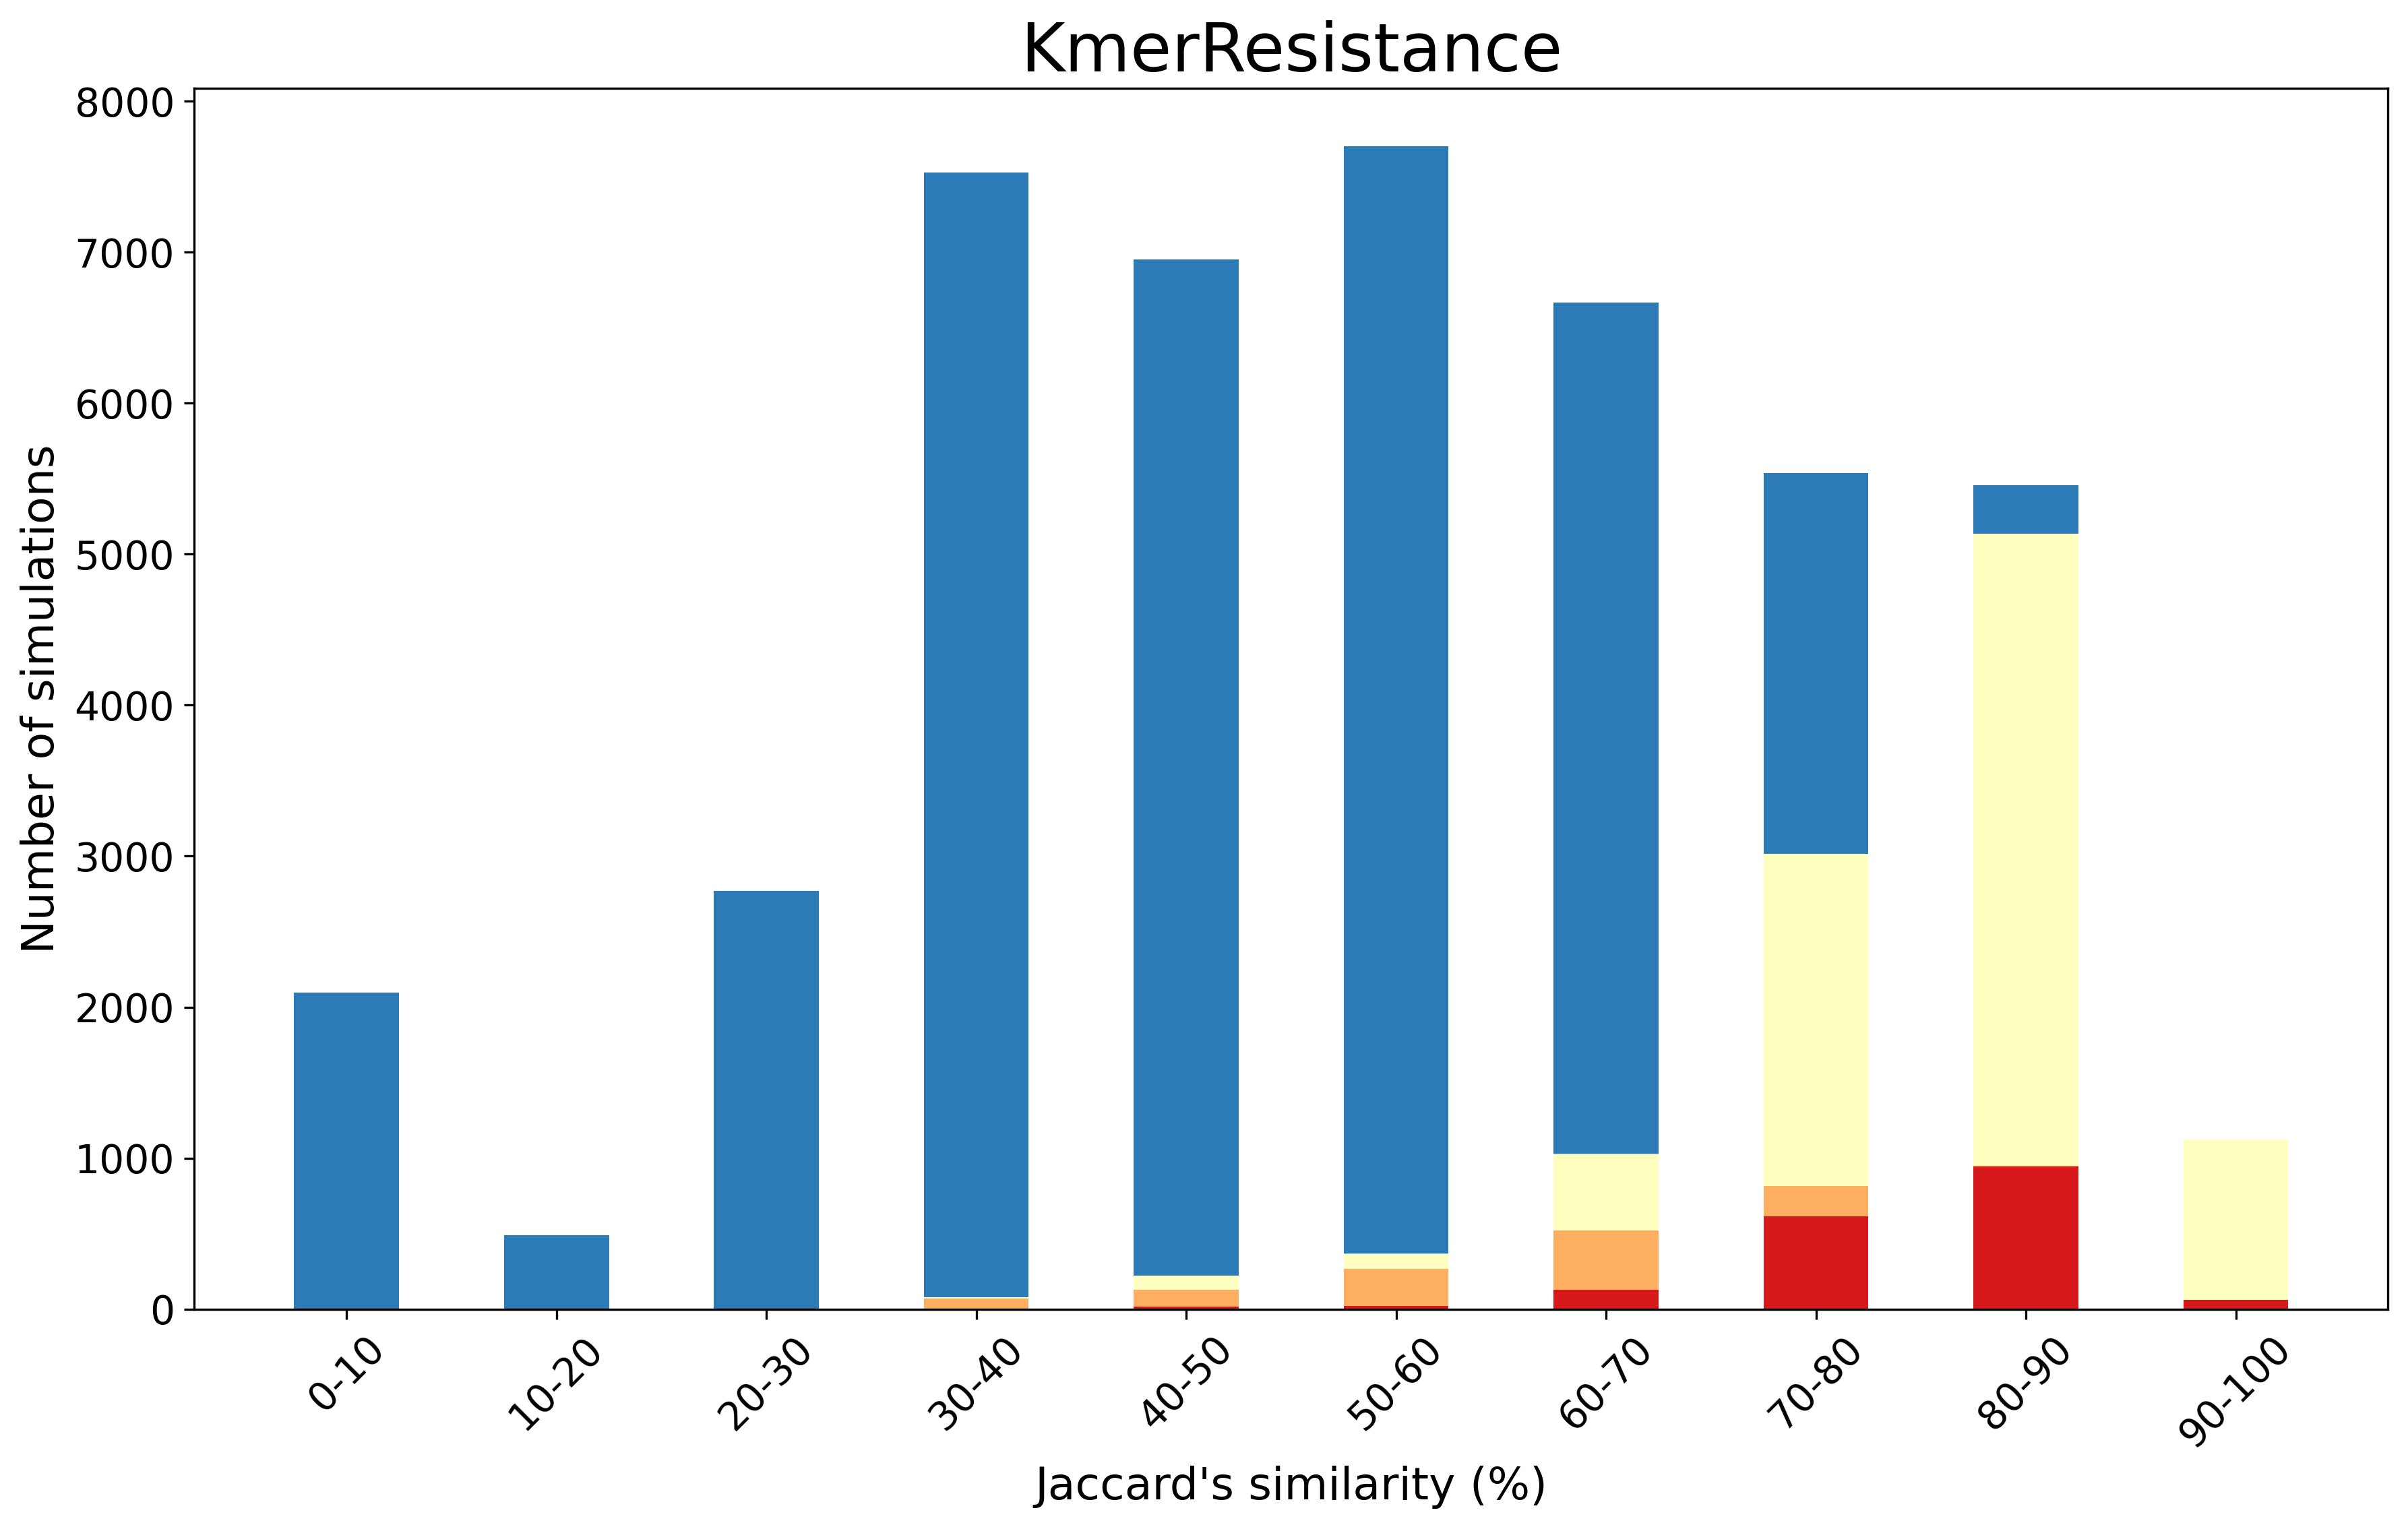

In [17]:
# Now to make a supplementary figure from these results

fig = plt.figure(figsize=(14,8), dpi=300)
ax = plt.subplot2grid((1,1),(0,0), rowspan = 1 , colspan= 1)

centiles = {k:[] for k in range(10)}

def jacc_group(jacc_sim):
    for k in range(10):
        jacc_lims = (round(0.1*k, 3), round(0.1*k+0.1, 3))
        # Interestingly you need to round here, Python 3 curio
        if jacc_lims[0] <= jacc_sim < jacc_lims[1]:
            output = jacc_lims
        else:
            pass
    return output

jacc_sims = []

for k in simulations_dict:
    jacc_sims.append(jacc_group(simulations_dict[k].jacc))    
    
print(Counter(jacc_sims))

# SRST2

for k in simulations_dict:
    centile = int(jacc_group(simulations_dict[k].jacc)[0]*10)
    centiles[centile].append(simulations_dict[k].kmerres_output)
    save_fig = "KmerResistance"

for k in centiles:
    centiles[k] =  Counter(centiles[k])
    print(centiles[k])

cent_final = {k:{"nil_correct":0,"one_correct_add":0, "one_correct":0, "two_correct_add":0, "two_correct":0} for k in centiles}

for k in cent_final:
    for j in cent_final[k]:
        if j not in centiles[k].keys():
            pass
        else:
            cent_final[k][j] = centiles[k][j]

centiles = cent_final
for k in centiles:
    print(k, centiles[k])
    
x = [k for k in centiles]
y1 = np.array([centiles[k]["nil_correct"] for k in centiles])
y2 = np.array([centiles[k]["one_correct_add"] for k in centiles])
y3 = np.array([centiles[k]["one_correct"] for k in centiles])
y4 = np.array([centiles[k]["two_correct_add"] for k in centiles])
y5 = np.array([centiles[k]["two_correct"] for k in centiles])


ax.bar(x, y1 ,width = 0.5, color = "#d7191c", label = "Nil") 
ax.bar(x, y2 ,width = 0.5, bottom = y1, color = "#fdae61", label = "One (+)" ) 
ax.bar(x, y3 ,width = 0.5, bottom = y1+y2, color = "#ffffbf", label="One") 
ax.bar(x, y4 ,width = 0.5, bottom = y1+y2+y3, color = "#abd9e9", label = "Two (+)") 
ax.bar(x, y5 ,width = 0.5, bottom = y1+y2+y3+y4, color= "#2c7bb6", label = "Two") 
ax.set_xlabel("Jaccard's similarity (%)", size = 16)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"], )
ax.tick_params("x", labelrotation=45, labelsize=14)
ax.set_ylabel("Number of simulations", size=16)
ax.tick_params("y", labelsize=14)
ax.set_title(save_fig, size=24)
# ax.legend(fontsize=16)

plt.savefig('{0}.png' .format(save_fig), dpi=300)

In [18]:
# Help messages for each of the programs to indicate defaults

#ABRicate abricate 0.8.11
# SYNOPSIS
#   Find and collate amplicons in assembled contigs
# AUTHOR
#   Torsten Seemann (@torstenseemann)
# USAGE
#   % abricate --list
#   % abricate [options] <contigs.{fasta,gbk,embl}[.gz]> > out.tab
#   % abricate --summary <out1.tab> <out2.tab> <out3.tab> ... > summary.tab
# GENERAL
#   --help          This help.
#   --debug         Verbose debug output (default '0').
#   --quiet         Quiet mode, no stderr output (default '0').
#   --version       Print version and exit.
#   --check         Check dependencies are installed (default '0').
#   --threads [N]   Use this many BLAST+ threads (default '1').
# DATABASES
#   --setupdb       Format all the BLAST databases (default '0').
#   --list          List included databases (default '0').
#   --datadir [X]   Location of database folders (default '/abricate/bin/../db').
#   --db [X]        Database to use (default 'resfinder').
# OUTPUT
#   --noheader      Suppress column header row (default '0').
#   --csv           Output CSV instead of TSV (default '0').
#   --nopath        Strip filename paths from FILE column (default '0').
# FILTERING
#   --minid [n.n]   Minimum DNA %identity (default '75').
#   --mincov [n.n]  Minimum DNA %coverage (default '0').
# MODE
#   --summary       Summarize multiple reports into a table (default '0').
# DOCUMENTATION
#   https://github.com/tseemann/abricate

# ARIBA

# ARIBA version: 2.11.1

# External dependencies:
# bowtie2	2.2.9	/bowtie2-2.2.9/bowtie2
# cdhit	4.6	/usr/bin/cdhit-est
# nucmer	3.1	/usr/bin/nucmer
# spades	NA	NOT_FOUND

# External dependencies OK: True

# Python version:
# 3.5.3 (default, Sep 14 2017, 22:58:41) 
# [GCC 6.3.0 20170406]

# Python packages:
# ariba	2.11.1	/usr/local/lib/python3.5/dist-packages/ariba-2.11.1-py3.5-linux-x86_64.egg/ariba/__init__.py
# bs4	4.6.0	/usr/local/lib/python3.5/dist-packages/beautifulsoup4-4.6.0-py3.5.egg/bs4/__init__.py
# dendropy	4.3.0	/usr/local/lib/python3.5/dist-packages/DendroPy-4.3.0-py3.5.egg/dendropy/__init__.py
# pyfastaq	3.17.0	/usr/local/lib/python3.5/dist-packages/pyfastaq-3.17.0-py3.5.egg/pyfastaq/__init__.py
# pymummer	0.10.3	/usr/local/lib/python3.5/dist-packages/pymummer-0.10.3-py3.5.egg/pymummer/__init__.py
# pysam	0.14	/usr/local/lib/python3.5/dist-packages/pysam-0.14-py3.5-linux-x86_64.egg/pysam/__init__.py

# Python packages OK: True

# Everything looks OK: True
# usage: ariba run [options] <prepareref_dir> <reads1.fq> <reads2.fq> <outdir>

# Runs the local assembly pipeline. Input is dir made by prepareref, and paired
# reads

# positional arguments:
#   prepareref_dir        Name of output directory when "ariba prepareref" was
#                         run
#   reads_1               Name of fwd reads fastq file
#   reads_2               Name of rev reads fastq file
#   outdir                Output directory (must not already exist)

# optional arguments:
#   -h, --help            show this help message and exit

# nucmer options:
#   --nucmer_min_id INT   Minimum alignment identity (delta-filter -i) [90]
#   --nucmer_min_len INT  Minimum alignment length (delta-filter -i) [20]
#   --nucmer_breaklen INT
#                         Value to use for -breaklen when running nucmer [200]

# Assembly options:
#   --assembler {fermilite,spades}
#                         Assembler to use
#   --assembly_cov INT    Target read coverage when sampling reads for assembly
#                         [50]
#   --min_scaff_depth INT
#                         Minimum number of read pairs needed as evidence for
#                         scaffold link between two contigs [10]
#   --spades_mode {wgs,sc,rna}
#                         If using Spades assembler, either use default WGS
#                         mode, Single Cell mode (`spades.py --sc`) or RNA mode
#                         (`spades.py --rna`). Use SC or RNA mode if your input
#                         is from a viral sequencing with very uneven and deep
#                         coverage. Set `--assembly_cov` to some high value if
#                         using SC or RNA mode
#   --spades_options SPADES_OPTIONS
#                         Extra options to pass to Spades assembler. Sensible
#                         default options will be picked based on
#                         `--spades_mode` argument. Anything set here will
#                         replace the defaults completely

# Other options:
#   --threads INT         Experimental. Number of threads. Will run clusters in
#                         parallel, but not minimap (yet) [1]
#   --assembled_threshold FLOAT (between 0 and 1)
#                         If proportion of gene assembled (regardless of into
#                         how many contigs) is at least this value then the flag
#                         gene_assembled is set [0.95]
#   --gene_nt_extend INT  Max number of nucleotides to extend ends of gene
#                         matches to look for start/stop codons [30]
#   --unique_threshold FLOAT (between 0 and 1)
#                         If proportion of bases in gene assembled more than
#                         once is <= this value, then the flag unique_contig is
#                         set [0.03]
#   --force               Overwrite output directory, if it already exists
#   --noclean             Do not clean up intermediate files
#   --tmp_dir TMP_DIR     Existing directory in which to create a temporary
#                         directory used for local assemblies
#   --verbose             Be verbose


# KMERRESISTANCE
# KmerResistance-2.0 correlates genes to species from WGS data, by mapping reads with KMA
# Options are:		Desc:				Default:		Requirements:
#
#	-i		Input/query file name					REQUIRED
#	-o		Output file						REQUIRED
#	-t_db		Template DB						REQUIRED
#	-s_db		Species DB						REQUIRED
#	-id		ID threshhold			70.0
#	-dct		Depth correction threshhold	0.1
#	-kma		alternative KMA		kma
#
# KMA options:		Desc:				Default:		Requirements:
#	-i		Input/query file name		None		REQUIRED
#	-o		Output file			None		REQUIRED
#	-t_db		Template DB			None		REQUIRED
#	-k		Kmersize			16
#	-e		evalue				0.05
#	-delta		Align in pieces of delta	511
#	-mem_mode	Use kmers to choose best
#			template, and save memory	False
#	-ex_mode	Searh kmers exhaustively	False
#	-deCon		Remove contamination		False
#	-dense		Do not allow insertions
#			in assembly			False
#	-ref_fsa	Consensus sequnce will
#			have "n" instead of gaps	False
#	-matrix		Print assembly matrix		False
#	-mp		Minimum phred score		30
#	-5p		Cut a constant number of
#			nucleotides from the 5 prime.	0
#	-Sparse		Run KmerFinder			False
#	-ID		Minimum ID			1.0%
#	-ss		Sparse sorting (q,c,d)		q
#	-shm		Use shared DB made by kma_shm	0 (lvl)
#	-swap		Swap DB to disk			0 (lvl)
#	-1t1		Skip HMM			False
#	-boot		Bootstrap sequence		False
#	-mrs		Minimum alignment score,
#			normalized to alignment length	0.5
#	-reward		Score for match			1
#	-penalty	Penalty for mismatch		-2
#	-gapopen	Penalty for gap opening		-3
#	-gapextend	Penalty for gap extension	-1
#	-h		Shows this help message
#


# SRST2 - Short Read Sequence Typer (v2)

# optional arguments:
#   -h, --help            show this help message and exit
#   --version             show program's version number and exit
#   --input_se INPUT_SE [INPUT_SE ...]
#                         Single end read file(s) for analysing (may be gzipped)
#   --input_pe INPUT_PE [INPUT_PE ...]
#                         Paired end read files for analysing (may be gzipped)
#   --merge_paired        Switch on if all the input read sets belong to a
#                         single sample, and you want to merge their data to get
#                         a single result
#   --forward FORWARD     Designator for forward reads (only used if NOT in
#                         MiSeq format sample_S1_L001_R1_001.fastq.gz; otherwise
#                         default is _1, i.e. expect forward reads as
#                         sample_1.fastq.gz)
#   --reverse REVERSE     Designator for reverse reads (only used if NOT in
#                         MiSeq format sample_S1_L001_R2_001.fastq.gz; otherwise
#                         default is _2, i.e. expect forward reads as
#                         sample_2.fastq.gz
#   --read_type {q,qseq,f}
#                         Read file type (for bowtie2; default is q=fastq; other
#                         options: qseq=solexa, f=fasta).
#   --mlst_db MLST_DB     Fasta file of MLST alleles (optional)
#   --mlst_delimiter MLST_DELIMITER
#                         Character(s) separating gene name from allele number
#                         in MLST database (default "-", as in arcc-1)
#   --mlst_definitions MLST_DEFINITIONS
#                         ST definitions for MLST scheme (required if mlst_db
#                         supplied and you want to calculate STs)
#   --mlst_max_mismatch MLST_MAX_MISMATCH
#                         Maximum number of mismatches per read for MLST allele
#                         calling (default 10)
#   --gene_db GENE_DB [GENE_DB ...]
#                         Fasta file/s for gene databases (optional)
#   --no_gene_details     Switch OFF verbose reporting of gene typing
#   --gene_max_mismatch GENE_MAX_MISMATCH
#                         Maximum number of mismatches per read for gene
#                         detection and allele calling (default 10)
#   --min_coverage MIN_COVERAGE
#                         Minimum %coverage cutoff for gene reporting (default
#                         90)
#   --max_divergence MAX_DIVERGENCE
#                         Maximum %divergence cutoff for gene reporting (default
#                         10)
#   --min_depth MIN_DEPTH
#                         Minimum mean depth to flag as dubious allele call
#                         (default 5)
#   --min_edge_depth MIN_EDGE_DEPTH
#                         Minimum edge depth to flag as dubious allele call
#                         (default 2)
#   --prob_err PROB_ERR   Probability of sequencing error (default 0.01)
#   --truncation_score_tolerance TRUNCATION_SCORE_TOLERANCE
#                         % increase in score allowed to choose non-truncated
#                         allele
#   --stop_after STOP_AFTER
#                         Stop mapping after this number of reads have been
#                         mapped (otherwise map all)
#   --other OTHER         Other arguments to pass to bowtie2 (must be escaped,
#                         e.g. "\--no-mixed".
#   --max_unaligned_overlap MAX_UNALIGNED_OVERLAP
#                         Read discarded from alignment if either of its ends
#                         has unaligned overlap with the reference that is
#                         longer than this value (default 10)
#   --mapq MAPQ           Samtools -q parameter (default 1)
#   --baseq BASEQ         Samtools -Q parameter (default 20)
#   --samtools_args SAMTOOLS_ARGS
#                         Other arguments to pass to samtools mpileup (must be
#                         escaped, e.g. "\-A").
#   --output OUTPUT       Prefix for srst2 output files
#   --log                 Switch ON logging to file (otherwise log to stdout)
#   --save_scores         Switch ON verbose reporting of all scores
#   --report_new_consensus
#                         If a matching alleles is not found, report the
#                         consensus allele. Note, only SNP differences are
#                         considered, not indels.
#   --report_all_consensus
#                         Report the consensus allele for the most likely
#                         allele. Note, only SNP differences are considered, not
#                         indels.
#   --use_existing_bowtie2_sam
#                         Use existing SAM file generated by Bowtie2 if
#                         available, otherwise they will be generated
#   --use_existing_pileup
#                         Use existing pileups if available, otherwise they will
#                         be generated
#   --use_existing_scores
#                         Use existing scores files if available, otherwise they
#                         will be generated
#   --keep_interim_alignment
#                         Keep interim files (sam & unsorted bam), otherwise
#                         they will be deleted after sorted bam is created
#   --threads THREADS     Use multiple threads in Bowtie and Samtools
#   --prev_output PREV_OUTPUT [PREV_OUTPUT ...]
#                         SRST2 results files to compile (any new results from
#                         this run will also be incorporated)